# Radiation

On this homework assignment, you will be responsible for importing all of the <tt>python</tt> packages you need for your calculations. You are also responsible for making your plot axis labels large enough for me to read them easily.

<ol>
    <li>Use Wien's displacement law, $\lambda_{\rm max} = \frac{2.898 \times 10^{-3} \mathrm{m} \cdot \mathrm{K}}{T}$, to find and plot the wavelength of maximum intensity for seven different types of stars: O5, B5, A5, F5, G5, K5, M5. Label both axes and each data point on your plot. You may find <a href="https://sites.uni.edu/morgans/astro/course/Notes/section2/spectraltemps.html">this table</a> of star types and temperatures helpful. Warning: watch your units.</li>
</ol>

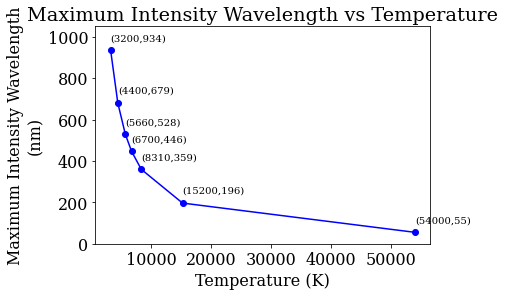

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
import math

plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"DeJavu Serif"})

nm=1*10**(-9)
#List of Star Surface Temperatures in Kelvin
TO5=54000
TB5=15200
TA5=8310
TF5=6700
TG5=5660
TK5=4400
TM5=3200

#Function defining Lambda_max
def Lambda_max(T):
  return (2.989*10**(-3))/T

#Turn the list of Temp values into an array so it can be plotted.
T_array=np.array([TO5,TB5,TA5,TF5,TG5,TK5,TM5])

#Plot the curve
plt.plot(T_array,Lambda_max(T_array)/nm,'bo-')

#To label these points I'm going to try a For loop with a zip function
#Zip mushes together elements of 2 arrays
for x,y in zip(T_array,Lambda_max(T_array)/nm):
  #this shows both coordinates as integers. I'd like to add star classification
  label=f"({int(x)},{int(y)})" 

  plt.annotate(label,
               (x,y),
               textcoords="offset points",
               xytext=(0,10),
               ha='left',
               size=10)

plt.xlabel('Temperature (K)')
plt.ylabel('Maximum Intensity Wavelength (nm)',wrap=True)
plt.title('Maximum Intensity Wavelength vs Temperature')
plt.ylim([0,1050])
plt.show()

#I'd like to add the type of star to the label, but I'll wait until after I finish #2
#I generated a warning that the font Arial was not found. It popped up when I added text wrapping to the ylabel
#I fixed it by using the font DeJavu Serif

In class we described the photoelectric effect qualitatively in terms of photons knocking electrons loose from their atoms. Here we will delve into the photoelectric effect quantitatively. Read about the photoelectric effect in your textbook, then read <em>Photoelectric effect step by step</em> in the Quantization module of Canvas. (Note: <em>Photoelectric effect step by step</em> is designed to go along with a lab, which we don't have.)

A note about units: recall from PHYS 208/245 that 1 Volt = 1 Joule/Coulomb. Electrons and protons give us a fundamental unit of electric charge, or elementary charge, $|q| = e = 1.602 \times 10^{−19}$ C. We can also calculate a fundamental unit of energy by calculating the change in kinetic energy of the elementary charge $e$ accelerated through an electric potential of 1 Volt. This new unit of energy is called the electron-Volt or eV. 1 eV = $1.602 \times 10^{−19}$ J.

<ol start=2>
    <li>Assume you are trying to verify the experimental results that led to Einstein's successful explanation of the photoelectric effect. You have two emitters or "photocathodes"; one is made of aluminum and the other is made of gold. On <strong>one set of axes</strong>, plot the <em>maximum</em> photoelectron kinetic energy in eV that you could measure as a function of frequency $\nu$ from <strong>both photocathodes</strong>. Make sure your plot shows the frequency cutoffs below which <em>no</em> photoelectrons will be generated. Label both axes and put a legend on your plot so a reader with no physics experience will know which curve belongs to which metal. You may find this <a href="http://hyperphysics.phy-astr.gsu.edu/hbase/Tables/photoelec.html">table of work functions</a> helpful.</li>
</ol>

[]

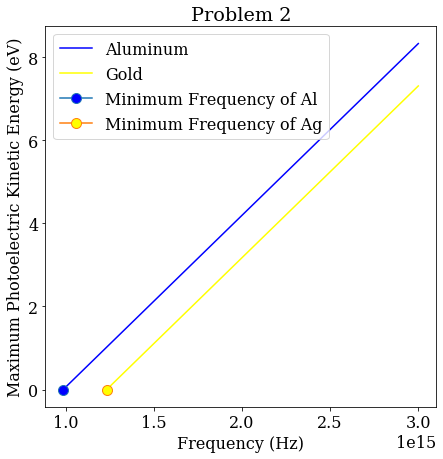

In [12]:
#Will need to do a subplot to plot 2 functions on one graph
#Constants
e=constants.e
h=constants.Planck
eV=constants.e

#Work functions are given in eV, but I need them in Joules for the initial calculation
#These convert those values to Joules
work_Al=4.08*eV
work_Ag=5.1*eV

#Function for KE in terms of eV
def K_Al(f):
  return (h*f-work_Al)/eV
def K_Ag(f):
  return (h*f-work_Ag)/eV

#Find minimum frequencies for both metals
f_Al_min=work_Al/h
f_Ag_min=work_Ag/h

#print(f_Al_min)
#print(f_Ag_min)

#Need frequency inputs from just under the minimum frequency of Al to a number
#significantly over the minimum frequency for Ag. I'm going to go just one order
#of magnitude over and hope that looks good.
f1=np.linspace(int(f_Al_min),3*10**15,num=1000,endpoint=True)
f2=np.linspace(int(f_Ag_min),3*10**15,num=1000,endpoint=True)
fig, ax=plt.subplots(figsize=(7,7))

#Plot the KE lines for both metals
ax.plot(f1,K_Al(f1),color='blue',label='Aluminum')
ax.plot(f2,K_Ag(f2),color='yellow',label='Gold')
#Plot the minimum KE for each metal
ax.plot(f_Al_min,K_Al(f_Al_min),marker='o',markersize=10,markerfacecolor='blue',label='Minimum Frequency of Al')
ax.plot(f_Ag_min,K_Ag(f_Ag_min),marker='o',markersize=10,markerfacecolor='yellow',label='Minimum Frequency of Ag')
#ax.annotate('({f_Al_min},{0})',(f_Al_min,0),
#            textcoords='offset points',ha='right',size=8)

ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Maximum Photoelectric Kinetic Energy (eV)")
ax.legend()
ax.set_title('Problem 2')
ax.plot()